

<h1 style="font-family: Trebuchet MS; text-align: center; color: #1b4332; font-size: 48px"><b>🫀Heart Disease visualisation🫀 </b>
 <hr>
    
<h1 style="font-family: Trebuchet MS; font-size: 14px; color: #264653; text-align: right; "><strong>Created By: Hassane Skikri</strong></h1>





<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">Data Import and Setup:</p>
<hr>


In [1]:
#importing all the data neaded
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Suppress the specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#global configuration parameter
%matplotlib inline
plt.rcParams['figure.dpi']=80
plt.rcParams["figure.autolayout"] = True #automatic layout adjustment
plt.rcParams["figure.figsize"] = [12.00, 5.00]




<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">Data leading</p>
<hr>


In [3]:

health = pd.read_csv ('/kaggle/input/brfss-samplecsv/BRFSS_sample.csv')
health.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,0,0.0,No,Female,65-69,White,No,Yes,Good,6.0,No,No,No
1,No,No,No,No,3,0.0,No,Female,35-39,Black,No,No,Very good,6.0,Yes,No,No
2,No,No,No,No,10,23.0,No,Female,18-24,White,No,Yes,Very good,6.0,Yes,No,No
3,No,No,No,No,0,0.0,No,Female,50-54,Hispanic,Yes,Yes,Fair,6.0,No,No,No
4,No,Yes,No,No,0,0.0,No,Male,60-64,White,No,No,Good,7.0,No,No,No






<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">Exploring the data </p>
<hr>


In [4]:
health.shape

(68796, 17)

In [5]:

health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68796 entries, 0 to 68795
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      68796 non-null  object 
 1   Smoking           68796 non-null  object 
 2   AlcoholDrinking   68796 non-null  object 
 3   Stroke            68796 non-null  object 
 4   PhysicalHealth    68796 non-null  int64  
 5   MentalHealth      68795 non-null  float64
 6   DiffWalking       68795 non-null  object 
 7   Sex               68795 non-null  object 
 8   AgeCategory       68795 non-null  object 
 9   Race              68795 non-null  object 
 10  Diabetic          68795 non-null  object 
 11  PhysicalActivity  68795 non-null  object 
 12  GenHealth         68795 non-null  object 
 13  SleepTime         68795 non-null  float64
 14  Asthma            68795 non-null  object 
 15  KidneyDisease     68795 non-null  object 
 16  SkinCancer        68795 non-null  object

In [6]:
health.isnull().sum()

HeartDisease        0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        1
DiffWalking         1
Sex                 1
AgeCategory         1
Race                1
Diabetic            1
PhysicalActivity    1
GenHealth           1
SleepTime           1
Asthma              1
KidneyDisease       1
SkinCancer          1
dtype: int64

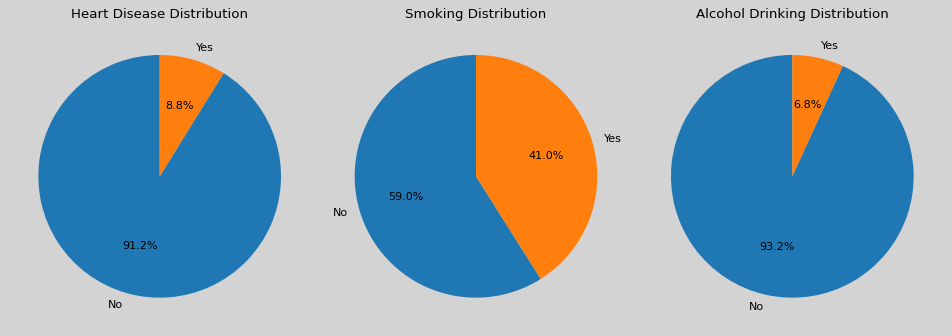

In [7]:
import matplotlib.pyplot as plt

# Sample data
data1 = health['HeartDisease'].value_counts()
data2 = health['Smoking'].value_counts()
data3 = health['AlcoholDrinking'].value_counts()

# Create a 3x1 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 12), tight_layout=True, facecolor='lightgray')

# Create pie plots for each dataset
axes[0].pie(data1, labels=data1.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Heart Disease Distribution')

axes[1].pie(data2, labels=data2.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Smoking Distribution')

axes[2].pie(data3, labels=data3.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Alcohol Drinking Distribution')

# If you have a fourth dataset (data4), you can add it here with another subplot.

# Display the plots
plt.show()





<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">Corrolation
</p>
<hr>


***Create a histogram plot to count the Sleep Time***  

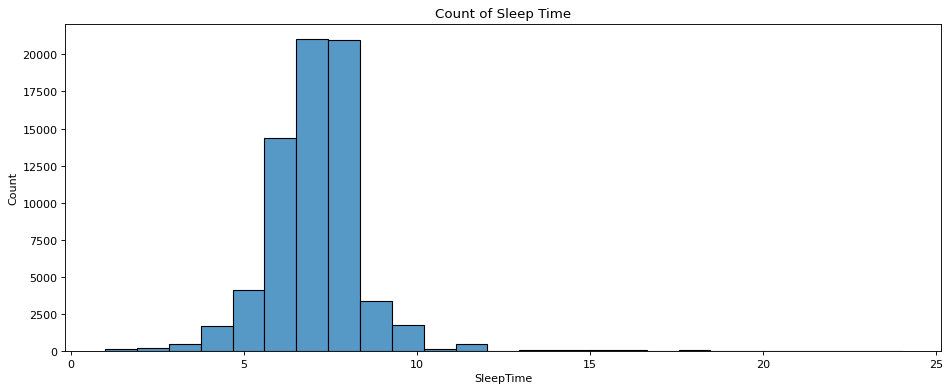

In [8]:
sleep_hist = sns.histplot(data=health, x='SleepTime', bins=25)
sleep_hist.set_title('Count of Sleep Time')
plt.show()

**In the histogram, we can see that the vast majority of survey participants reported sleeping 5 to 10 hours a day.**

***visualize the densite of the Sleep Time***

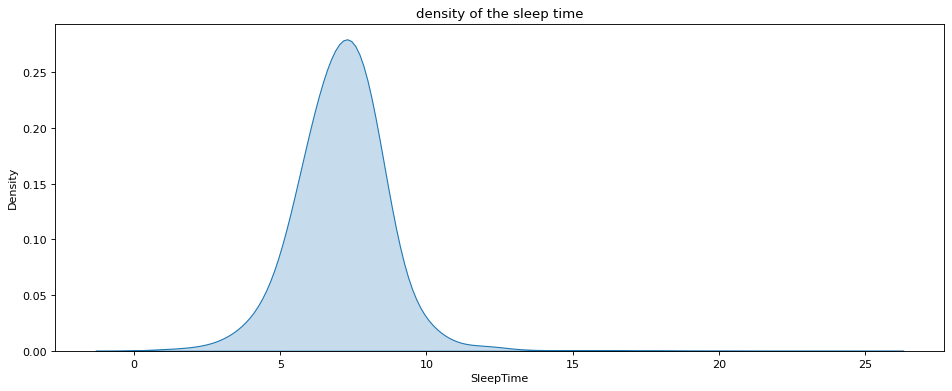

In [9]:
sleep_kde = sns.kdeplot(data=health, x='SleepTime', fill=True, bw_adjust=5)
sleep_kde.set_title('density of the sleep time')
plt.show()

**As in the histogram, we can clearly see that most participants sleep 4 to 10 hours a day. Those that sleep much more than this or much less are outliers.
so we need to remove dos outliers from the health fram**

***removing the outliers***

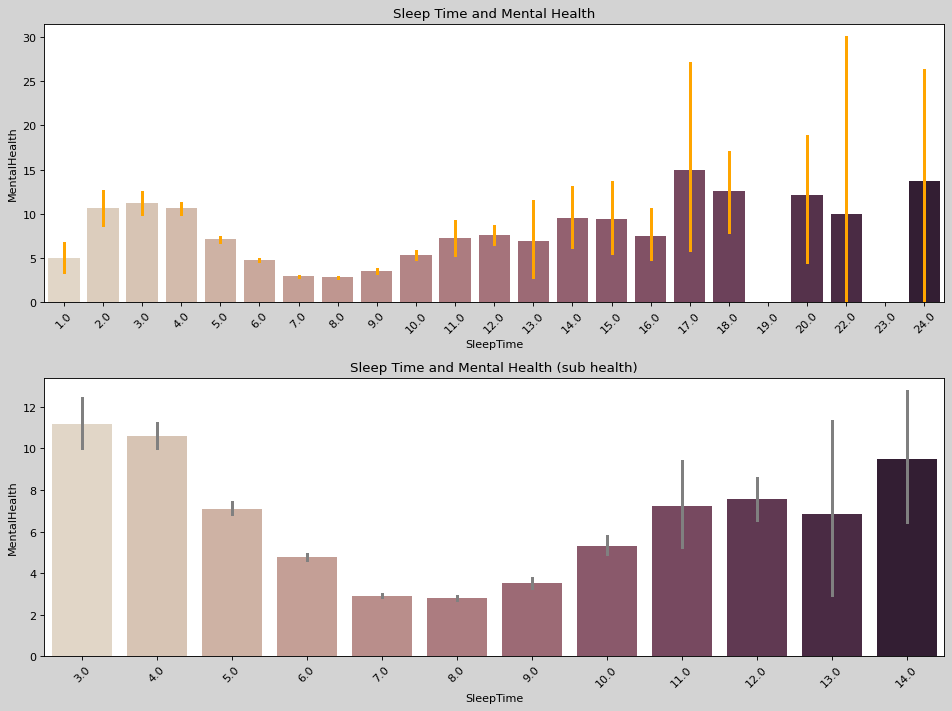

In [10]:

# Create the figure and axes with two vertically stacked subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 9), tight_layout=True, facecolor='lightgray')

# Plot on the first subplot (Sleep Time and Mental Health for the health dataset)
S_M_health_top = sns.barplot(x="SleepTime", y="MentalHealth", data=health, color="grey", errcolor='orange', palette='ch:.25', ax=axes[0])
S_M_health_top.set_xticklabels(S_M_health_top.get_xticklabels(), rotation=45)
axes[0].set_title('Sleep Time and Mental Health')

# Subset the data for the second subplot (Sleep Time and Mental Health for the subhealth dataset)
# Subset to 3-14 hours of sleep
health_sub = health.loc[(health["SleepTime"] < 15) & (health["SleepTime"] > 2)]

S_M_health_bottom = sns.barplot(data=health_sub, x='SleepTime', y='MentalHealth', palette='ch:.25', errcolor='grey', ax=axes[1])
S_M_health_bottom.set_xticklabels(S_M_health_bottom.get_xticklabels(), rotation=45)
axes[1].set_title('Sleep Time and Mental Health (sub health)')

plt.show()


**By removing the outliers, the new bar plot is much cleaner and easier to interpret. Now, we can see that participants that sleep 8 hours a day generally report the least poor mental health days.**

**Explain the relationship between :**
 - `SleepTime vs. MentalHealth`
 - `SleepTime vs. PhysicalHealth`.

[Text(0.5, 1.0, 'Sleep and Physical Health'),
 Text(0.5, 0, 'Daily hours of sleep'),
 Text(0, 0.5, 'Average days per month with poor physical health')]

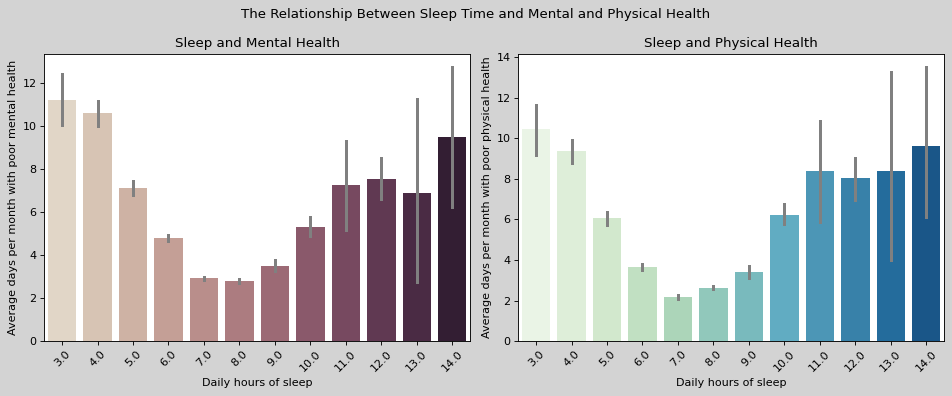

In [11]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True, facecolor='lightgray')
fig.suptitle("The Relationship Between Sleep Time and Mental and Physical Health")
#mental health plot
S_M_health = sns.barplot(ax=axes[0],data=health_sub, x='SleepTime', y='MentalHealth', palette='ch:.25',  errcolor='grey')
S_M_health.set_xticklabels(S_M_health.get_xticklabels(), rotation=45)
axes[0].set(title='Sleep and Mental Health', xlabel='Daily hours of sleep', ylabel='Average days per month with poor mental health')
# physical health plot
S_P_health = sns.barplot(ax=axes[1],data=health_sub, x='SleepTime', y='PhysicalHealth', palette='GnBu',  errcolor='grey')
S_P_health.set_xticklabels(S_M_health.get_xticklabels(), rotation=45)
axes[1].set(title='Sleep and Physical Health', xlabel='Daily hours of sleep', ylabel='Average days per month with poor physical health')



- When daily sleep hours deviate from 6 to 8, mental and physical health tend to worsen.
- Optimal sleep duration within this range appears to correlate with better monthly mental and physical health.
- This suggests the importance of maintaining a balanced sleep schedule for overall health.

## Look at the interaction between sleep, mental and physical health, and alcohol consumption and smoking


***The relationship between Sleep and Mental Health in Alcohol-drinkers and Non-drinkers***

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


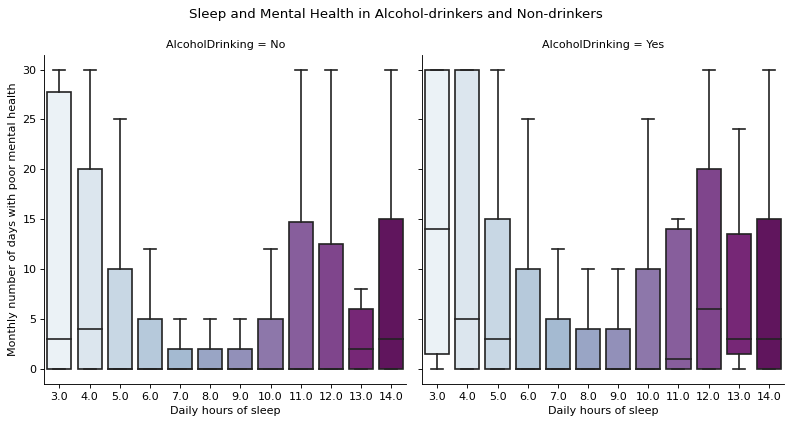

In [12]:
# create M_A_boxplot
A_M_S_boxplot = sns.catplot(data=health_sub, kind='box', col='AlcoholDrinking', x='SleepTime', y='MentalHealth', palette='BuPu', showfliers=False)

A_M_S_boxplot.set(xlabel='Daily hours of sleep', ylabel='Monthly number of days with poor mental health')

A_M_S_boxplot.fig.suptitle('Sleep and Mental Health in Alcohol-drinkers and Non-drinkers', y=1.05)# to prevent the plot from overlapping with the content of the plot or axes.

plt.show()

we can see an uptick in the number of poor mental health days for alcohol drinkers.

***The relationship between Sleep and Physical Health in Alcohol-drinkers and Non-drinkers***

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


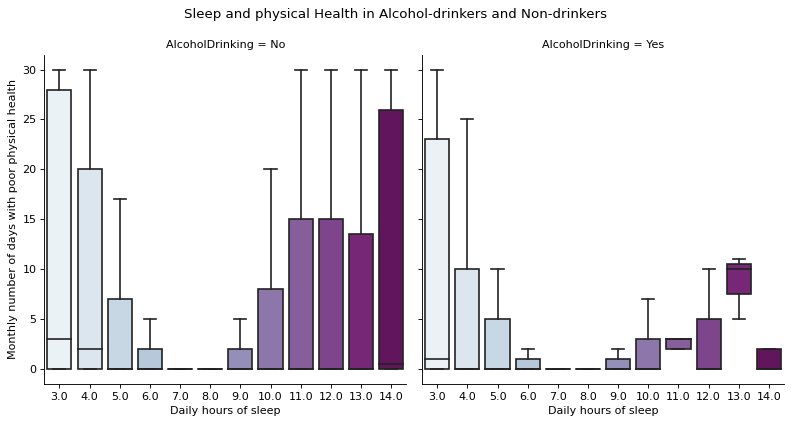

In [13]:
# create M_A_boxplot
A_P_S_boxplot = sns.catplot(data=health_sub, kind='box', col='AlcoholDrinking', x='SleepTime', y='PhysicalHealth', palette='BuPu', showfliers=False)

A_P_S_boxplot.set(xlabel='Daily hours of sleep', ylabel='Monthly number of days with poor physical health')

A_P_S_boxplot.fig.suptitle('Sleep and physical Health in Alcohol-drinkers and Non-drinkers', y=1.05)

plt.show()

**comparison between participants who reported drinking more than the recommended amount of alcohol to those who reported drinking less, This comparison is essential to understand the distribution of participants across these two categorical groups.**

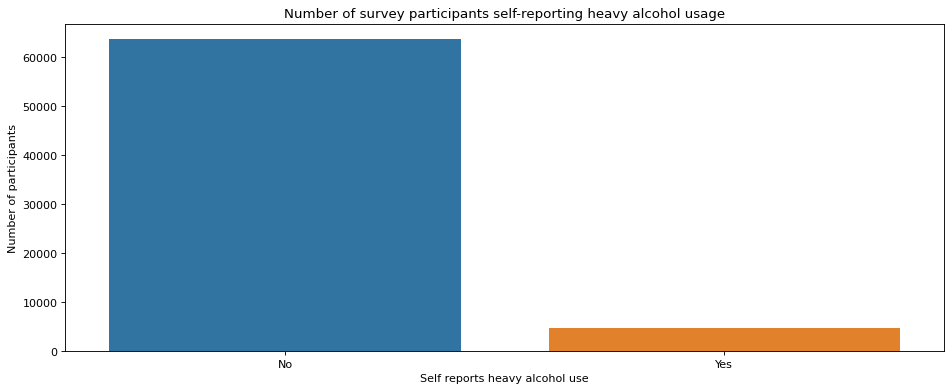

In [14]:
# create A_counts plot
A_counts = sns.countplot(data=health_sub, x='AlcoholDrinking')

# set title and axes labels
A_counts.set(title='Number of survey participants self-reporting heavy alcohol usage', xlabel='Self reports heavy alcohol use', ylabel='Number of participants')

plt.show()

we can see a rise remarkable  in the number of poor physical health days for alcohol drinkers.

***The relationship between Sleep and Physical Health in smokers and Non-smokers***

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


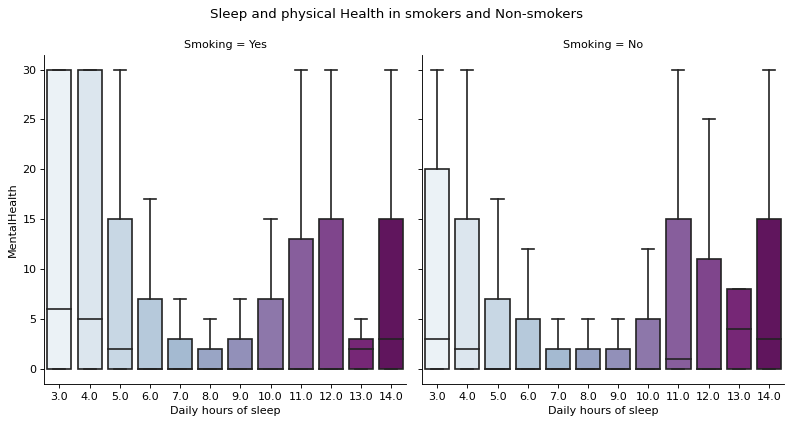

In [15]:
# create M_A_boxplot
A_P_S_boxplot = sns.catplot(data=health_sub, kind='box', col='Smoking', x='SleepTime', y='MentalHealth', palette='BuPu', showfliers=False)

A_P_S_boxplot.set(xlabel='Daily hours of sleep')

A_P_S_boxplot.fig.suptitle('Sleep and physical Health in smokers and Non-smokers', y=1.05)

plt.show()

***The relatioship between Physical health and Smokers in Health Disease***

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


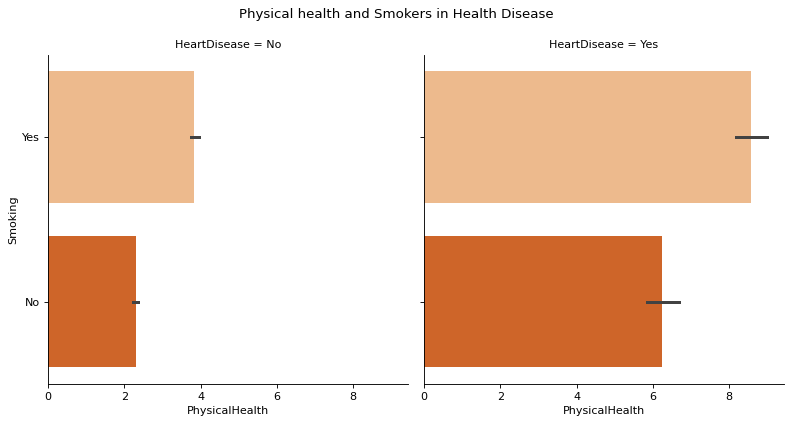

In [16]:

H_S_P_barplot = sns.catplot(kind='bar',data=health_sub,col='HeartDisease',x='PhysicalHealth',y='Smoking',palette='Oranges')
H_S_P_barplot.fig.suptitle('Physical health and Smokers in Health Disease', y=1.05)
plt.show()

**we can see that people who smoke and have a heart Disease has a lot number of days with poor physical health**